# Functional enrichment analysis with g:Profiler

In [1]:
library(tidyverse)
library(gprofiler2)

-- Attaching packages --------------------------------------------------------------------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.4     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.0

-- Conflicts ------------------------------------------------------------------------------------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



## Load DEG results

In [2]:
deg <- data.table::fread('../../metrics_summary/_m/male_specific_DE_4features.txt') %>%
    select(gencodeID, ensemblID, Symbol, logFC, "adj.P.Val")
deg %>% head(2)

gencodeID,ensemblID,Symbol,logFC,adj.P.Val
<chr>,<chr>,<chr>,<dbl>,<dbl>
ENSG00000198399.14,ENSG00000198399,ITSN2,0.08350713,3.352944e-06
ENSG00000060982.14,ENSG00000060982,BCAT1,0.16611260,1.145543e-05


## Calculated enrichment and visual plot

In [3]:
save_ggplots <- function(fn, p, w, h){
    for(ext in c('.pdf', '.png', '.svg')){
        ggsave(paste0(fn, ext), plot=p, width=w, height=h)
    }
}

In [7]:
gostres <- gost(query=deg$ensemblID, organism="hsapiens", 
                correction_method="g_SCS", significant=TRUE)
gostres$result %>% 
    data.table::fwrite(file = "DEGs_functional_enrichment.tsv", sep="\t")
gostres$result %>% head(2)

,query,significant,p_value,term_size,query_size,intersection_size,precision,recall,term_id,source,term_name,effective_domain_size,source_order,parents
,<chr>,<lgl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<list>
1,query_1,TRUE,8.425964e-17,4274,2323,731,0.3146793,0.1710342,GO:0006464,GO:BP,cellular protein modification process,18017,2477,"GO:0036211, GO:0044267"
2,query_1,TRUE,8.425964e-17,4274,2323,731,0.3146793,0.1710342,GO:0036211,GO:BP,protein modification process,18017,11011,"GO:0019538, GO:0043412"


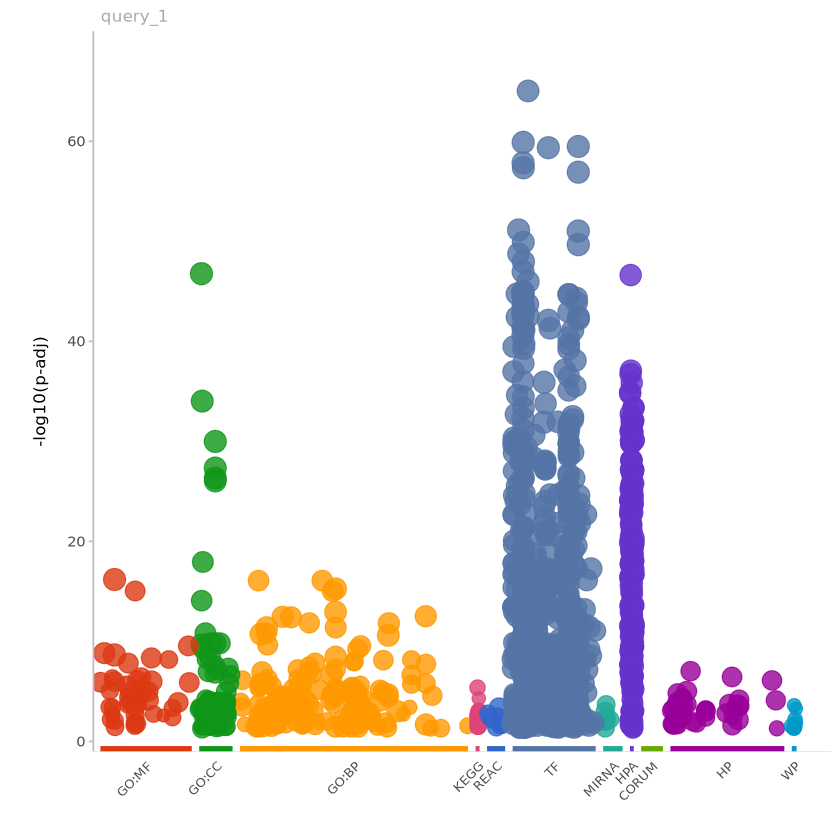

In [8]:
p <- gostplot(gostres, capped = FALSE, interactive = FALSE)
print(p)
save_ggplots("DEGs_manhattan", p, 9, 5)

In [9]:
deg_sz = deg %>% filter(logFC > 0)
gostres <- gost(query=deg_sz$ensemblID, organism="hsapiens", 
                correction_method="g_SCS", significant=TRUE)
gostres$result %>% 
    data.table::fwrite(file = "upreg_DEGs_functional_enrichment.tsv", sep="\t")
gostres$result %>% head(5)

,query,significant,p_value,term_size,query_size,intersection_size,precision,recall,term_id,source,term_name,effective_domain_size,source_order,parents
,<chr>,<lgl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<list>
1,query_1,TRUE,2.329664e-12,4274,1227,410,0.3341483,0.09592887,GO:0006464,GO:BP,cellular protein modification process,18017,2477,"GO:0036211, GO:0044267"
2,query_1,TRUE,2.329664e-12,4274,1227,410,0.3341483,0.09592887,GO:0036211,GO:BP,protein modification process,18017,11011,"GO:0019538, GO:0043412"
3,query_1,TRUE,2.141427e-11,4489,1227,422,0.3439283,0.09400757,GO:0043412,GO:BP,macromolecule modification,18017,12401,GO:0043170
4,query_1,TRUE,3.617705e-11,3246,1227,325,0.2648737,0.10012323,GO:0033036,GO:BP,macromolecule localization,18017,9271,GO:0051179
5,query_1,TRUE,1.574706e-10,5996,1227,529,0.4311328,0.08822548,GO:0019538,GO:BP,protein metabolic process,18017,6824,"GO:0043170, GO:0044238, GO:1901564"


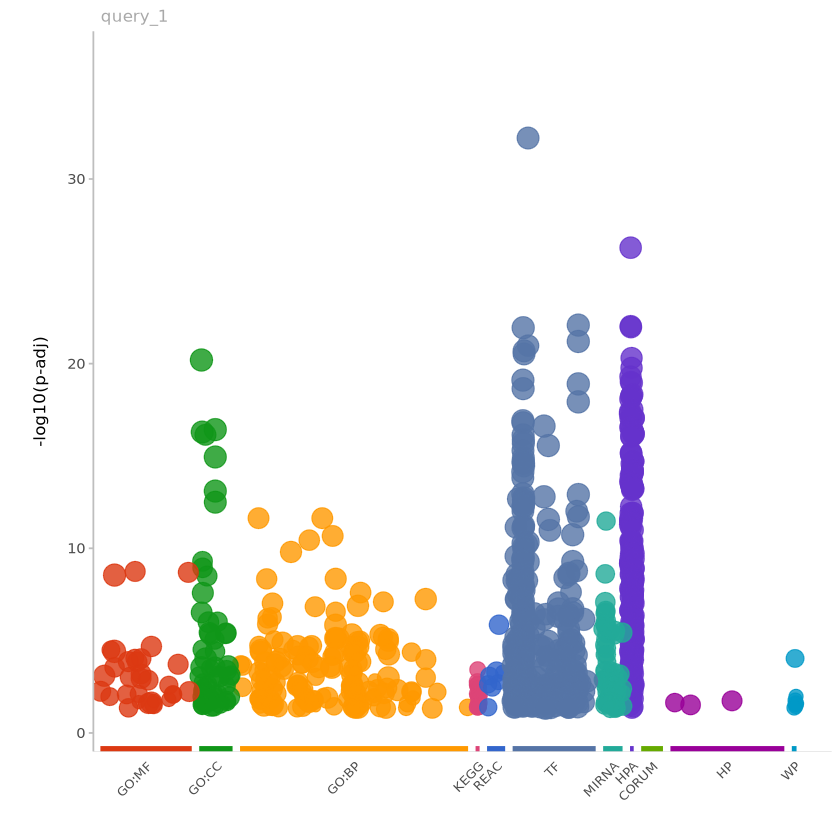

In [10]:
p <- gostplot(gostres, capped = FALSE, interactive = FALSE)
print(p)
save_ggplots("upreg_DEGs_manhattan", p, 9, 5)

In [11]:
deg_ctl = deg %>% filter(logFC < 0)
gostres <- gost(query=deg_ctl$ensemblID, organism="hsapiens", 
                correction_method="g_SCS", significant=TRUE) 
gostres$result %>% 
    data.table::fwrite(file = "downreg_DEGs_functional_enrichment.tsv", sep="\t")
gostres$result %>% head(2)

,query,significant,p_value,term_size,query_size,intersection_size,precision,recall,term_id,source,term_name,effective_domain_size,source_order,parents
,<chr>,<lgl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<list>
1,query_1,TRUE,2.509320e-07,10936,1105,770,0.69683258,0.07040966,GO:0044237,GO:BP,cellular metabolic process,18017,12789,"GO:0008152, GO:0009987"
2,query_1,TRUE,5.361033e-06,484,1105,65,0.05882353,0.13429752,GO:0043087,GO:BP,regulation of GTPase activity,18017,12231,GO:0051336


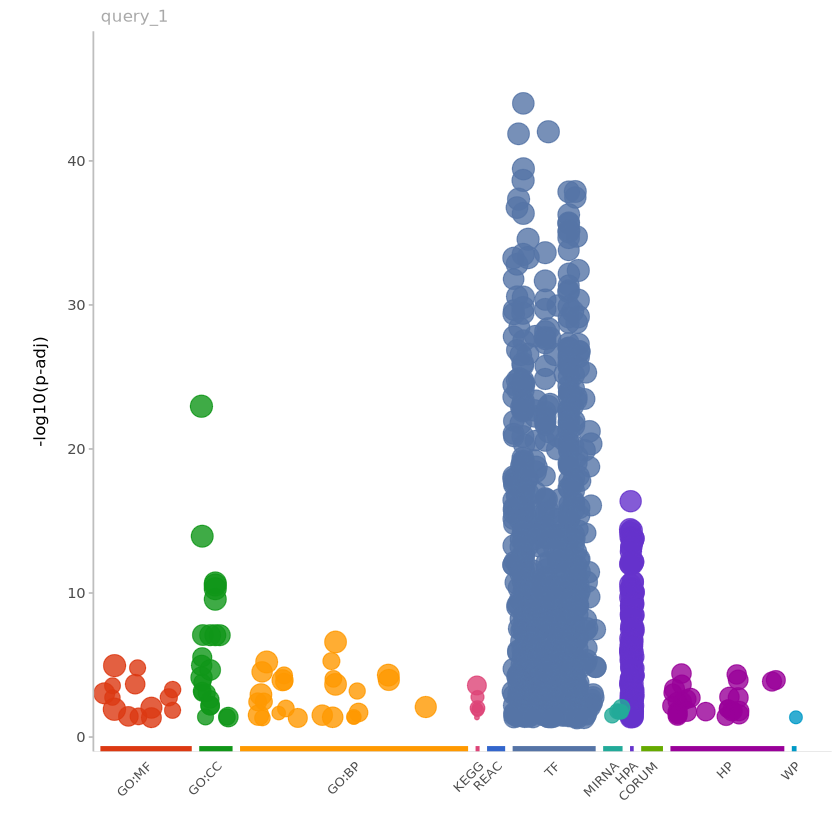

In [12]:
p <- gostplot(gostres, capped = FALSE, interactive = FALSE)
print(p)
save_ggplots("downreg_DEGs_manhattan", p, 9, 5)

## Reproducibility Information

In [ ]:
Sys.time()
proc.time()
options(width = 120)
sessioninfo::session_info()